# models comparison

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [3]:
output_dir = r"14_RL_agent_TDlearn_output_model_comparison_wsls"
os.makedirs(output_dir, exist_ok=True)

file_see_colors = "11_RL_agent_TDlearn_output_wsls/models_evaluation.csv"
file_see_numbers = "12_RL_agent_TDlearn_output_wsls/models_evaluation.csv"
file_see_colors_and_numbers = "13_RL_agent_TDlearn_output_wsls/models_evaluation.csv"


df_see_colors = pd.read_csv(file_see_colors)
df_see_numbers = pd.read_csv(file_see_numbers)
df_see_colors_and_numbers = pd.read_csv(file_see_colors_and_numbers)
df_see_colors_and_numbers

,participants,best_alpha,best_beta,BIC,AIC,accuracy,precision,sensitivity_recall,specificity,f1_score,mcFadden_r2,r2
0,07_11_2024_17_23_43,0.456070,0.609564,380.196479,372.999635,0.466667,0.457143,0.484848,0.449275,0.470588,0.013808,-1.134387
1,08_11_2024_13_03_29,0.514234,0.489453,383.831668,376.634824,0.503704,0.578947,0.496774,0.513043,0.534722,-0.011628,-1.029734
2,11_11_2024_16_46_44,0.495177,0.609564,381.323993,374.127149,0.492593,0.484375,0.466165,0.518248,0.475096,0.010990,-1.030075
3,12_11_2024_00_15_17,0.514234,0.410383,381.376499,374.179655,0.503704,0.510204,0.547445,0.458647,0.528169,0.010850,-0.985621
4,13_11_2024_10_46_21,0.524756,0.555201,382.859942,375.663098,0.503704,0.507463,0.500000,0.507463,0.503704,0.007004,-0.985294
5,13_11_2024_14_45_52,0.542696,0.386735,378.407402,371.210558,0.522222,0.533333,0.521739,0.522727,0.527473,0.018590,-0.912055
6,14_11_2024_21_46_47,0.493796,0.529651,383.781470,376.584626,0.544444,0.575540,0.555556,0.531746,0.565371,0.001378,-0.830357
7,15_11_2024_11_43_48,0.456070,0.489453,382.829620,375.632776,0.466667,0.457143,0.484848,0.449275,0.470588,0.006771,-1.134387
8,17_11_2024_15_25_39,0.472215,0.539342,382.792365,375.595521,0.537037,0.488889,0.540984,0.533784,0.513619,0.000528,-0.869185
9,17_11_2024_23_57_47,0.592415,0.590893,377.365077,370.168233,0.496296,0.528986,0.506944,0.484127,0.517730,0.018575,-1.023810


# models evaluation metrics

Saved: 14_RL_agent_TDlearn_output_model_comparison_wsls\models_evaluation_metrics.pdf


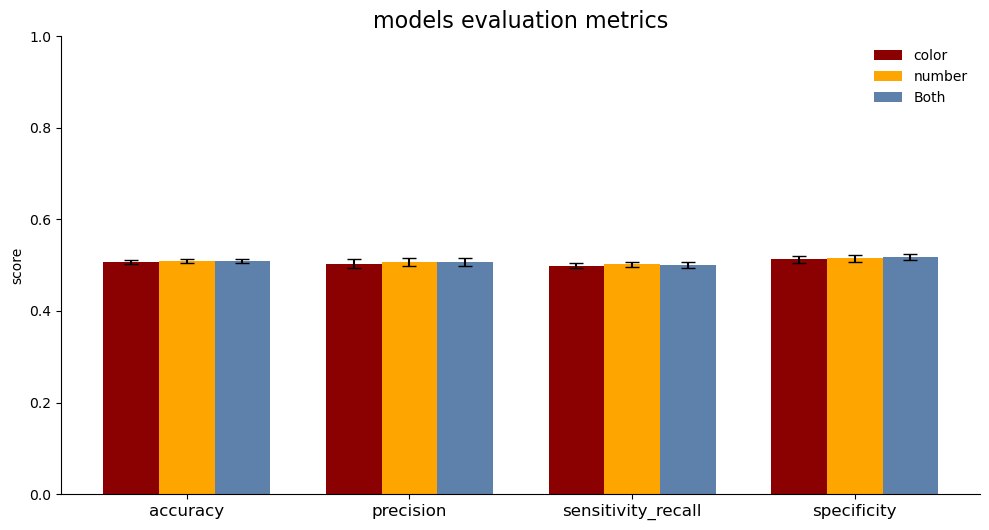

In [4]:
metrics = ['accuracy', 'precision', 'sensitivity_recall', 'specificity']
conditions = ['color', 'number', 'Both']
colors = ['#8b0000', 'orange', '#5e81ac']

# Compute means and SEMs
means = [
    df_see_colors[metrics].mean().values,
    df_see_numbers[metrics].mean().values,
    df_see_colors_and_numbers[metrics].mean().values
]

sems = [
    df_see_colors[metrics].sem().values,
    df_see_numbers[metrics].sem().values,
    df_see_colors_and_numbers[metrics].sem().values
]

means = np.array(means)
sems = np.array(sems)

# Plotting
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i in range(len(conditions)):
    bars.append(
        ax.bar(
            x + (i - 1) * width, 
            means[i], 
            width, 
            yerr=sems[i],
            capsize=5,
            label=conditions[i], 
            color=colors[i]
        )
    )

# Labels and aesthetics
ax.set_ylabel('score')
ax.set_title('models evaluation metrics', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, 1)
legend = ax.legend(frameon=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_metrics.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# BIC and R2 calculations

In [5]:
bic_see_colors = df_see_colors["BIC"]
bic_see_numbers = df_see_numbers["BIC"]
bic_sees_colors_and_numbers = df_see_colors_and_numbers["BIC"]

aic_see_colors = df_see_colors["AIC"]
aic_see_numbers = df_see_numbers["AIC"]
aic_sees_colors_and_numbers = df_see_colors_and_numbers["AIC"]

mcFadden_r2_see_colors = df_see_colors["mcFadden_r2"]
mcFadden_r2_see_numbers = df_see_numbers["mcFadden_r2"]
mcFadden_r2_sees_colors_and_numbers = df_see_colors_and_numbers["mcFadden_r2"]

delta_bic_see_colors_see_numbers = bic_see_colors - bic_see_numbers
delta_bic_see_colors_and_numbers_see_colors = bic_see_colors - bic_sees_colors_and_numbers
delta_bic_see_colors_and_numbers_see_numbers = bic_see_numbers - bic_sees_colors_and_numbers

delta_aic_see_colors_see_numbers = aic_see_colors - aic_see_numbers
delta_aic_see_colors_and_numbers_see_colors = aic_see_colors - aic_sees_colors_and_numbers
delta_aic_see_colors_and_numbers_see_numbers = aic_see_numbers - aic_sees_colors_and_numbers

delta_mcFadden_r2_see_colors_see_numbers = mcFadden_r2_see_colors - mcFadden_r2_see_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_colors = mcFadden_r2_see_colors - mcFadden_r2_sees_colors_and_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_numbers = mcFadden_r2_see_numbers - mcFadden_r2_sees_colors_and_numbers



# BIC and R2 calculations visualizations

C:\Users\Nill\AppData\Local\Temp\1\ipykernel_7064\2283828842.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_bic = axs[0].boxplot(
C:\Users\Nill\AppData\Local\Temp\1\ipykernel_7064\2283828842.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_aic = axs[1].boxplot(
C:\Users\Nill\AppData\Local\Temp\1\ipykernel_7064\2283828842.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_mcFadden = axs[2].boxplot(


Saved: 14_RL_agent_TDlearn_output_model_comparison_wsls\models_evaluation_comparison_bic_r2.pdf


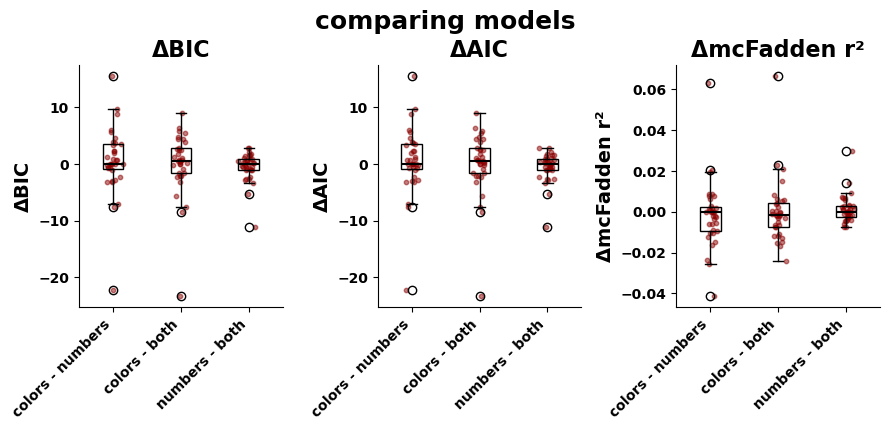

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(9, 5))

bic_deltas = [delta_bic_see_colors_see_numbers, delta_bic_see_colors_and_numbers_see_colors, delta_bic_see_colors_and_numbers_see_numbers]
aic_deltas = [delta_aic_see_colors_see_numbers, delta_aic_see_colors_and_numbers_see_colors, delta_aic_see_colors_and_numbers_see_numbers]
mcFadden_r2_deltas = [delta_mcFadden_r2_see_colors_see_numbers, delta_mcFadden_r2_see_colors_and_numbers_see_colors, delta_mcFadden_r2_see_colors_and_numbers_see_numbers]

bic_labels = ["colors - numbers", "colors - both", "numbers - both"]
mcFadden_labels = ["colors - numbers", "colors - both", "numbers - both"]

# Plot BIC deltas
box_bic = axs[0].boxplot(
    bic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Plot AIC deltas
box_aic = axs[1].boxplot(
    aic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Plot McFadden R2 deltas
box_mcFadden = axs[2].boxplot(
    mcFadden_r2_deltas, vert=True, patch_artist=True, labels=mcFadden_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Set box colors
for box in box_bic['boxes']:
    box.set(facecolor='none')
for box in box_aic['boxes']:
    box.set(facecolor='none')
for box in box_mcFadden['boxes']:
    box.set(facecolor='none')

scatter_colors = ['#8b0000', '#8b0000', '#8b0000']

# Add scatter points for BIC deltas
for i, delta in enumerate(bic_deltas):
    axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

# Add scatter points for AIC deltas
for i, delta in enumerate(aic_deltas):
    axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[1].set_title("ΔAIC", fontsize=16, fontweight='bold')
axs[1].set_ylabel("ΔAIC", fontsize=14, fontweight='bold')

# Add scatter points for McFadden R2 deltas
for i, delta in enumerate(mcFadden_r2_deltas):
    axs[2].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[2].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
axs[2].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

# Adjust axis properties
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('comparing models', fontsize=18, fontweight='bold', y=0.85)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_bic_r2.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# now best alpha and best beta:

In [7]:
best_alphas_see_colors = df_see_colors["best_alpha"]
best_alphas_see_numbers = df_see_numbers["best_alpha"]
best_alphas_sees_colors_and_numbers = df_see_colors_and_numbers["best_alpha"]

best_betas_see_colors = df_see_colors["best_beta"]
best_betas_see_numbers = df_see_numbers["best_beta"]
best_betas_sees_colors_and_numbers = df_see_colors_and_numbers["best_beta"]

# visualizations

Saved: 14_RL_agent_TDlearn_output_model_comparison_wsls\models_evaluation_comparison_best_alpha_beta.pdf


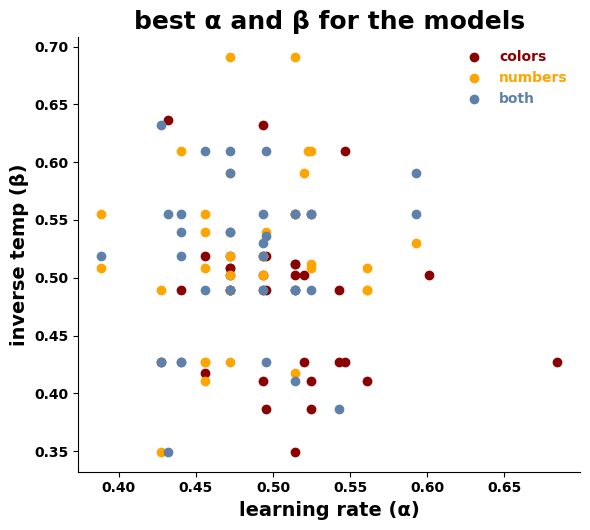

In [8]:
scatter_colors = ['#8b0000', 'orange', '#5e81ac']

alpha_values = [
    best_alphas_see_colors, 
    best_alphas_see_numbers, 
    best_alphas_sees_colors_and_numbers
]

beta_values = [
    best_betas_see_colors, 
    best_betas_see_numbers, 
    best_betas_sees_colors_and_numbers
]

labels = ['colors', 'numbers', 'both']

plt.figure(figsize=(6, 6))
for i in range(3):
    plt.scatter(alpha_values[i], beta_values[i], color=scatter_colors[i], label=labels[i])

plt.xlabel("learning rate (α)", fontsize=14, fontweight='bold')
plt.ylabel("inverse temp (β)", fontsize=14, fontweight='bold')
plt.title("best α and β for the models", fontsize=18, fontweight='bold')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize= 10, fontweight='bold')
plt.yticks(fontsize= 10, fontweight='bold')

legend = plt.legend(frameon=False)
for text, color in zip(legend.get_texts(), scatter_colors):
    text.set_color(color)
    text.set_fontweight('bold')
    
plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_best_alpha_beta.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")


plt.show()
